# Deep Learning Fundamentals - Coursework Final

## Lim Zhao Hong, Student ID: 20065320

### Cats and Dog dataset: https://www.kaggle.com/datasets/erkamk/cat-and-dog-images-dataset

### Import Library

In [1]:
import pandas as pd
import numpy as np
from keras.utils import np_utils
from keras import layers
from keras.models import Sequential
import tensorflow as tf
from PIL import Image
import os
import matplotlib.pyplot as plt
import cv2
import os
import warnings
warnings.filterwarnings("ignore")


### Import Dataset

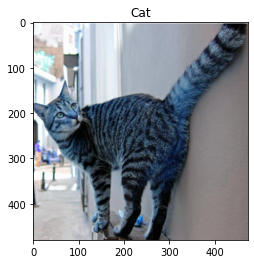

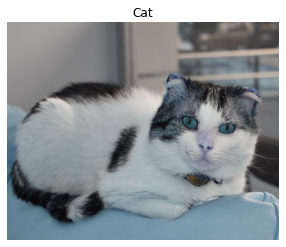

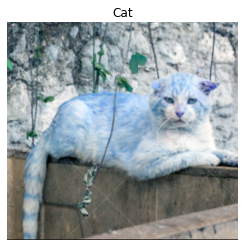

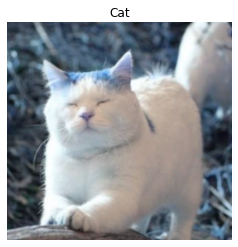

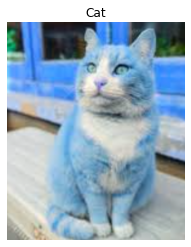

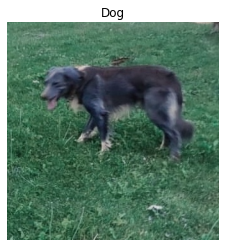

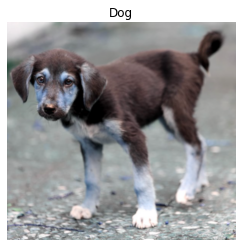

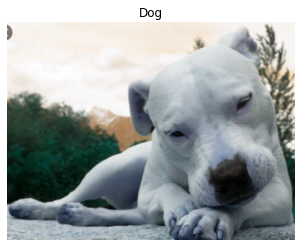

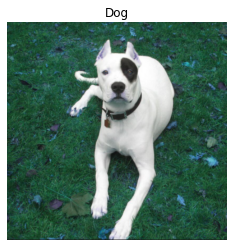

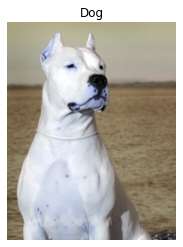

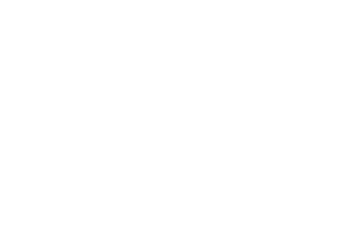

In [2]:
DATADIR = r"C:/Users/Admin/Desktop/Republic Poly/FA1-1-C2349C-A Deep Learning Fundamentals/CWF/Dog and Cat .png/"
CATEGORIES = ["Cat", "Dog"]

for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    i=0
    for img in os.listdir(path):
        img = cv2.imread(os.path.join(path,img))
        plt.imshow(img)
        plt.title(('Cat' if category == "Cat" else 'Dog'))
        plt.show()
        plt.axis("off")
        i+=1
        if i == 5:
            break

### Data Preparation

In [3]:
IMG_SIZE = 180 
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE)) 
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()

In [4]:
X = []
y = []
for features,label in training_data:
    X.append(features)
    y.append(label)
X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE)
print(X.shape)
X = X/255.0  
X = X.reshape(-1,180,180,1)

(1000, 180, 180)


In [5]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
Y = to_categorical(y, num_classes = 2)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.2, random_state=42)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (800, 180, 180, 1)
x_test shape (200, 180, 180, 1)
y_train shape (800, 2)
y_test shape (200, 2)


In [7]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam, RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()
#
model.add(Conv2D(filters = 16, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180,180,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

#
model.add(Conv2D(filters = 64, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

# 
model.add(Flatten())
model.add(Dense(96, activation = "relu"))
model.add(Dropout(0.25))
model.add(Dense(2, activation = "softmax"))
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
epochs = 20
batch_size = 40
datagen = ImageDataGenerator(   
        rotation_range=15,
        zoom_range = 0.1,
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip=True,  
        vertical_flip=True) 

In [8]:
datagen.fit(X_train)
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              steps_per_epoch = X_train.shape[0] // batch_size)   

Epoch 1/20
20/20 [==============================] - 10s 454ms/step - loss: 1.1555 - accuracy: 0.4762 - val_loss: 0.6940 - val_accuracy: 0.4700
Epoch 2/20
20/20 [==============================] - 9s 439ms/step - loss: 0.6921 - accuracy: 0.5400 - val_loss: 0.6958 - val_accuracy: 0.4800
Epoch 3/20
20/20 [==============================] - 9s 429ms/step - loss: 0.6946 - accuracy: 0.5113 - val_loss: 0.6932 - val_accuracy: 0.5150
Epoch 4/20
20/20 [==============================] - 9s 422ms/step - loss: 0.6951 - accuracy: 0.4850 - val_loss: 0.6937 - val_accuracy: 0.4750
Epoch 5/20
20/20 [==============================] - 8s 420ms/step - loss: 0.6928 - accuracy: 0.5312 - val_loss: 0.6940 - val_accuracy: 0.4800
Epoch 6/20
20/20 [==============================] - 8s 421ms/step - loss: 0.6941 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5050
Epoch 7/20
20/20 [==============================] - 9s 425ms/step - loss: 0.6930 - accuracy: 0.5025 - val_loss: 0.6930 - val_accuracy: 0.5200
Epoch

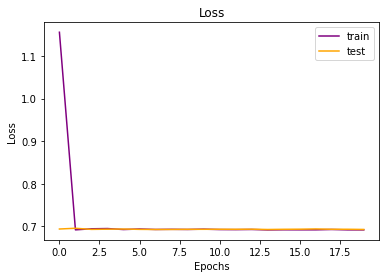

In [9]:
plt.plot(history.history["loss"],c = "purple")
plt.plot(history.history["val_loss"],c = "orange")
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["train", "test"])
plt.show()

#### Loss between train and test result show close matching

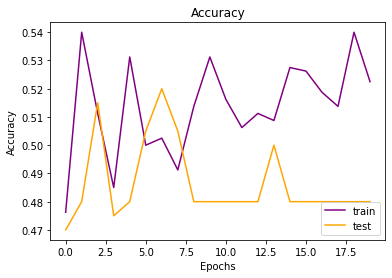

In [10]:
plt.plot(history.history["accuracy"],c = "purple")
plt.plot(history.history["val_accuracy"],c = "orange")
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["train", "test"])
plt.show()

#### Accuracy between train and test result show close matching

## Hyperparameters tuning:  <br>1) Change dropout <br>2) Change compile optimiser to adam <br>3) Change learning rate to 0.01 <br>4) Add one more filter layer

In [11]:

model = Sequential()
#
model.add(Conv2D(filters = 16, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180,180,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.1)) ##Change dropout to 0.1

#
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.1)) ##Change dropout to 0.1

#
model.add(Conv2D(filters = 64, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.1)) ##Change dropout to 0.1

#
model.add(Conv2D(filters = 128, kernel_size = (2,2),padding = 'Same', ##Add one more filter layer
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.1)) ##Change dropout to 0.1

# 
model.add(Flatten())
model.add(Dense(96, activation = "relu"))
model.add(Dropout(0.1))
model.add(Dense(2, activation = "softmax")) 
optimizer = Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999) ##Change learning rate to 0.01
model.compile(optimizer = 'adam' , loss = "categorical_crossentropy", metrics=["accuracy"]) ## Compile using adam
epochs = 30
batch_size = 40
datagen = ImageDataGenerator(   
        rotation_range=15,
        zoom_range = 0.1,
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip=True,  
        vertical_flip=True) 

In [12]:
datagen.fit(X_train)
history1 = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              steps_per_epoch = X_train.shape[0] // batch_size)   

Epoch 1/30
20/20 [==============================] - 9s 447ms/step - loss: 0.7030 - accuracy: 0.4925 - val_loss: 0.6932 - val_accuracy: 0.4800
Epoch 2/30
20/20 [==============================] - 9s 440ms/step - loss: 0.6939 - accuracy: 0.5138 - val_loss: 0.6918 - val_accuracy: 0.5200
Epoch 3/30
20/20 [==============================] - 9s 437ms/step - loss: 0.6927 - accuracy: 0.4975 - val_loss: 0.6927 - val_accuracy: 0.5400
Epoch 4/30
20/20 [==============================] - 9s 437ms/step - loss: 0.6909 - accuracy: 0.5337 - val_loss: 0.6886 - val_accuracy: 0.5550
Epoch 5/30
20/20 [==============================] - 9s 434ms/step - loss: 0.6871 - accuracy: 0.5550 - val_loss: 0.6807 - val_accuracy: 0.5300
Epoch 6/30
20/20 [==============================] - 9s 439ms/step - loss: 0.6730 - accuracy: 0.5800 - val_loss: 0.6776 - val_accuracy: 0.5500
Epoch 7/30
20/20 [==============================] - 9s 445ms/step - loss: 0.6765 - accuracy: 0.5713 - val_loss: 0.6882 - val_accuracy: 0.5350
Epoch 

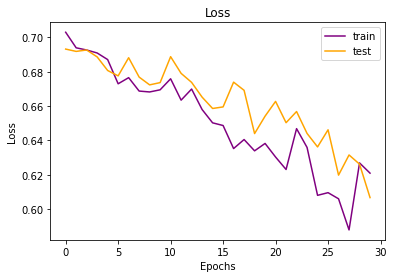

In [13]:
plt.plot(history1.history["loss"],c = "purple")
plt.plot(history1.history["val_loss"],c = "orange")
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["train", "test"])
plt.show()

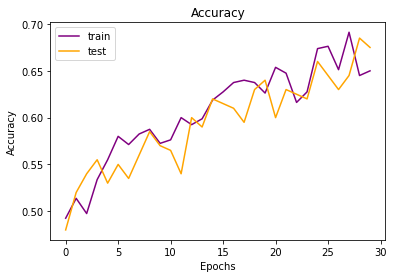

In [14]:
plt.plot(history1.history["accuracy"],c = "purple")
plt.plot(history1.history["val_accuracy"],c = "orange")
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["train", "test"])
plt.show()

#### Accuracy improve over the initial model

# Transfer Learning using VGG16 architecture

In [15]:
from keras.applications import vgg16

# importing VGG16 from keras with pre-trained weights that is trained on imagenet
# include_top > whether to include the 3 fully-connected layers at the top of the network.
# weights > to use the weights from pre-training on Imagenet
vggModel = vgg16.VGG16(include_top=True, weights='imagenet')

In [16]:
vggModel.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

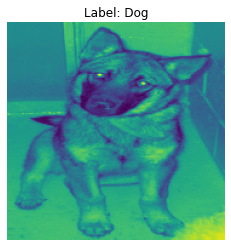

In [17]:
# Randomly select an image with label for predict by origin VGG16, to checkout the correctiveness 
import random
imgSize = len(X)

selected = random.randint(0, imgSize)

img = X[selected]

plt.imshow(img)

plt.axis('off')

plt.title('Label: {}'.format(CATEGORIES[y[selected]]))

plt.show()

### Prediction

In [18]:
#### Preparing the image for prediction into VGG16
import numpy as np
from PIL import Image
from keras.preprocessing import image

# Create an image memory object
im = Image.fromarray(img, 'RGB')

# 224x224 is the default image size required by VGG16
im = im.resize((224, 224))
x = np.array(im)

# Add a fourth dimension (since Keras expects a list of images)
x = np.expand_dims(x, axis=0)
#im = Image.fromarray((x * 255).astype(np.uint8))

# Normalize the input image's pixel values to the range used when training the neural network
# This step is required if you are using the base VGG16 model without further training
x = vgg16.preprocess_input(x)

In [19]:
# Run the image through the deep neural network to make a prediction
predictions = vggModel.predict(x)

# Look up the names of the predicted classes. Index zero is the results for the first image.
predicted_classes = vgg16.decode_predictions(predictions)

for imagenet_id, name, likelihood in predicted_classes[0]:
    print("Prediction: {} - {:2f}%".format(name, likelihood*100))

1/1 [==============================] - 0s 254ms/step
Prediction: doormat - 44.331741%
Prediction: dishrag - 16.264711%
Prediction: poncho - 4.095180%
Prediction: wool - 2.352094%
Prediction: chain_mail - 2.249892%


# Transfer Learning using VGG19 architecture

## The concept of the VGG19 model (also VGGNet-19) is the same as the VGG16 except that it supports 19 layers. The “16” and “19” stand for the number of weight layers in the model (convolutional layers). This means that VGG19 has three more convolutional layers than VGG16

In [20]:
from keras.applications import vgg19

# importing VGG16 from keras with pre-trained weights that is trained on imagenet
# include_top > whether to include the 3 fully-connected layers at the top of the network.
# weights > to use the weights from pre-training on Imagenet
vggModel1 = vgg19.VGG19(include_top=True, weights='imagenet')
#IMAGE_SIZE = [224, 224] #Default image size for VGG16
#vggModel = vgg19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [21]:
vggModel1.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

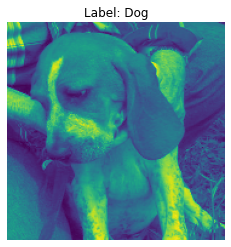

In [22]:
# Randomly select an image with label for predict by VGG19, to checkout the correctiveness 
import random
imgSize = len(X)

selected = random.randint(0, imgSize)

img = X[selected]

plt.imshow(img)

plt.axis('off')

plt.title('Label: {}'.format(CATEGORIES[y[selected]]))

plt.show()

## Data augmentation using ImageDataGenerator (Geometric transformation)

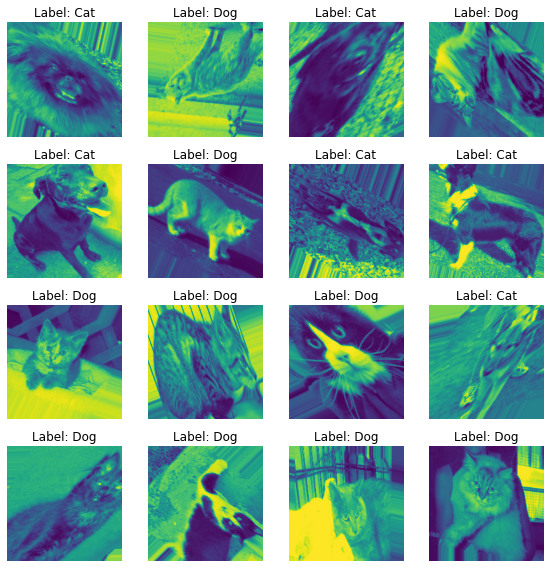

In [23]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import keras.utils.np_utils as ku

# Initialize the ImageDataGenerator for geometric transformation
datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=45,
                             width_shift_range=[-8, 8],
                             height_shift_range=[-8, 8],
                             shear_range=45,
                             zoom_range=[0.75, 1.25],
                             horizontal_flip=True,
                             vertical_flip=True,
                             validation_split=0.2)

# Convert the labels to one-hot vector
y_train_cat = ku.to_categorical(Y_train)

for batch_x, batch_y in datagen.flow(X_train, y_train_cat, batch_size=16):
    plt.figure(figsize=(8, 8))
    for i in range(16):
        x = batch_x[i]
        y = batch_y[i]
        index = np.argmax(y)
        plt.subplot(4, 4, i+1)
        plt.imshow(x)
        plt.axis('off')
        plt.title('Label: {}'.format(CATEGORIES[index]))
    plt.tight_layout()
    plt.show()
    break

## Data augmentation using ImageDataGenerator (Colour space transformation)

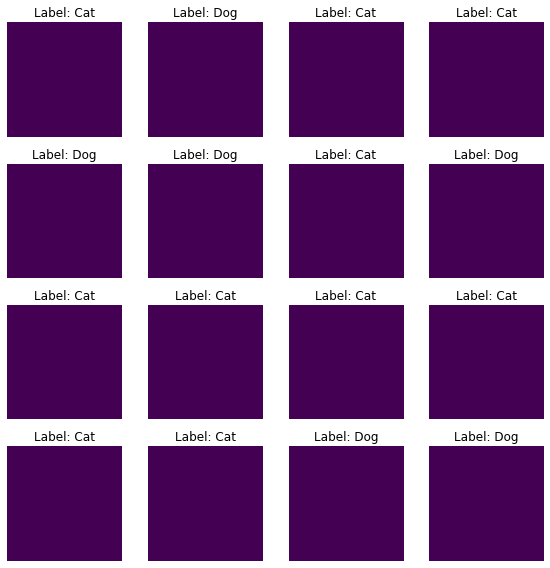

In [24]:
# Initialize the ImageDataGenerator for colour space transformation
datagen = ImageDataGenerator(rescale=1./255,
                             channel_shift_range=0.25,
                             brightness_range=[0.2, 1.2])

for batch_x, batch_y in datagen.flow(X_train, y_train_cat, batch_size=16):
    plt.figure(figsize=(8, 8))
    for i in range(16):
        x = batch_x[i]
        y = batch_y[i]
        index = np.argmax(y)
        plt.subplot(4, 4, i+1)
        plt.imshow(x)
        plt.axis('off')
        plt.title('Label: {}'.format(CATEGORIES[index]))
    plt.tight_layout()
    plt.show()
    break

## Conclusion

### Hyperparameter tuning with Adam optimiser, adjustment in learning rate/dropout and an additional layer provide a better validation accuracy. <br> In term of accuracy, the model can be improved further